In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/인사교/DL

/content/drive/MyDrive/인사교/DL


### 목표
- yolov6에 데이터셋을 입력하여 학습시키고 활용해보자!
- yolo모델 : 울트라리틱스에서 만든 오픈소스 모델
  - 활용 분야 : 객체탐지(디텍션), 세분화(세그멘테이션), 분류 등 컴퓨터 비전 관련 기능을 수행할 수 있는 대중적인 모델
  - 데이터셋 주로 RoboFlow에서 공유받을 수 있음!

In [3]:
# yolo v6 설치
# !git clone https://github.com/meituan/YOLOv6
%cd YOLOv6
!pip install -r requirements.txt

In [7]:
!pwd

/content/drive/MyDrive/인사교/DL/YOLOv6


In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Tul3aQKb1W7lRRPJdcyc")
project = rf.workspace("work-space-wurwn").project("chincilla_detection")
version = project.version(1)
dataset = version.download("mt-yolov6")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to chincilla_detection-1 in mt-yolov6:: 100%|██████████| 113/113 [00:00<00:00, 140.21it/s]


In [11]:
!pip3 install addict

In [38]:
# yolo v6 학습(훈련)
!python tools/train.py --batch 32 --conf configs/yolov6s_finetune.py --epochs 100 --img-size 640 --data chincilla_detection-1/data.yaml --device 0

2024-09-09 07:27:56.050190: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-09 07:27:56.071330: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-09 07:27:56.077987: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-09 07:27:56.094197: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-09 07:27:57.278751: W tensorflow/compiler/tf2

#### yolo 모델의 평가지표
- Precision(정밀도) : P로 예측한 것들 중에, 실제 P의 비율
- recall (재현율) : 실제 T인 것 중에 예측이 P인 비율

- mAP(mean Avarage Precision) : 모들 평균 정밀도의 평균
  - 여러 물체에 대해 정밀도를 꼐산한 다음, 그 평균을 낸 값

In [43]:
# yolo v6 예측
!python tools/infer.py --yaml chincilla_detection-1/data.yaml --weights runs/train/exp1/weights/best_ckpt.pt --source chincilla_detection-1/images/valid/ --device 0

Namespace(weights='runs/train/exp1/weights/best_ckpt.pt', source='chincilla_detection-1/images/valid/', webcam=False, webcam_addr='0', yaml='chincilla_detection-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp1/weights/best_ckpt.pt
/content/drive/MyDrive/인사교/DL/YOLOv6/yolov6/utils/checkpoint.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weigh

In [44]:
# 탐지가 잘 되었는지 이미지 파일들을 불러오기
import glob # 파일들을 쉽게 불러오기 위한 도구
glob.glob('./runs/inference/exp/*.jpg')

['./runs/inference/exp/10_jpg.rf.6caa58dce133ffbe35980a67968ba46e.jpg',
 './runs/inference/exp/21_jpg.rf.4e93ba3c8424e05127f35a8249b3f1eb.jpg',
 './runs/inference/exp/25_jpg.rf.5f10778591c7fcc4457d51bebbdfdb9e.jpg',
 './runs/inference/exp/29_jpg.rf.39d3da8dddde5fd6f169a71e2cbe8726.jpg',
 './runs/inference/exp/2_jpg.rf.cdf3563f90685d12b6072600acbaf993.jpg',
 './runs/inference/exp/30_jpg.rf.7a406ef342c57c916d03c855c1f7dbac.jpg',
 './runs/inference/exp/3_jpg.rf.70ff8b352b2c4480cbe742d8becdc06d.jpg',
 './runs/inference/exp/42_jpg.rf.e801f58ecad731b5168de48e2c92273f.jpg',
 './runs/inference/exp/44_jpg.rf.1efe19223b0c27d0f4fbdc26a0a32fb8.jpg',
 './runs/inference/exp/9_jpg.rf.9d7361077731694bd4d9c32d3f9884d1.jpg']

In [18]:
from IPython.display import Image # 이미지 파일 출력 용도

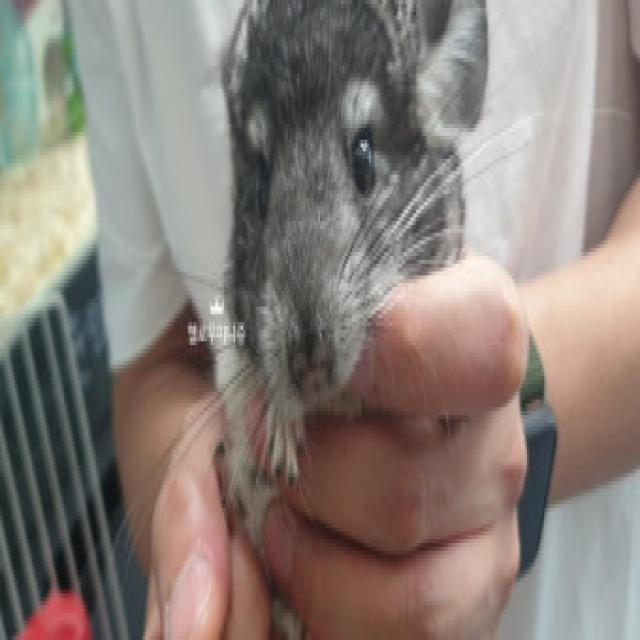

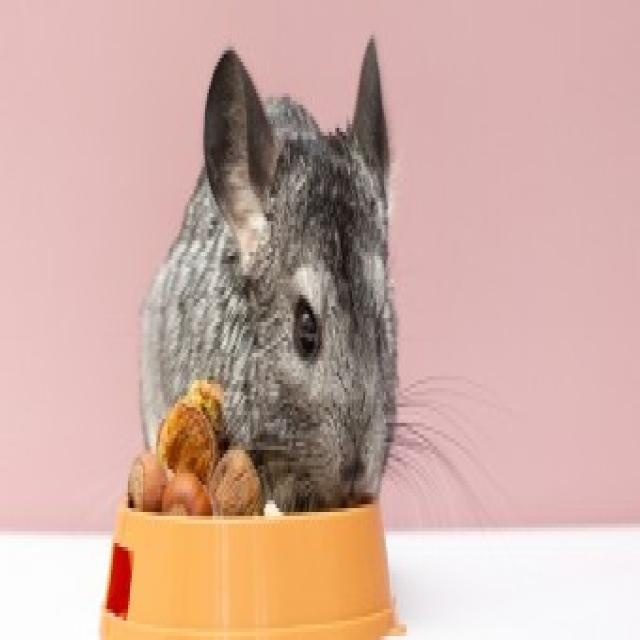

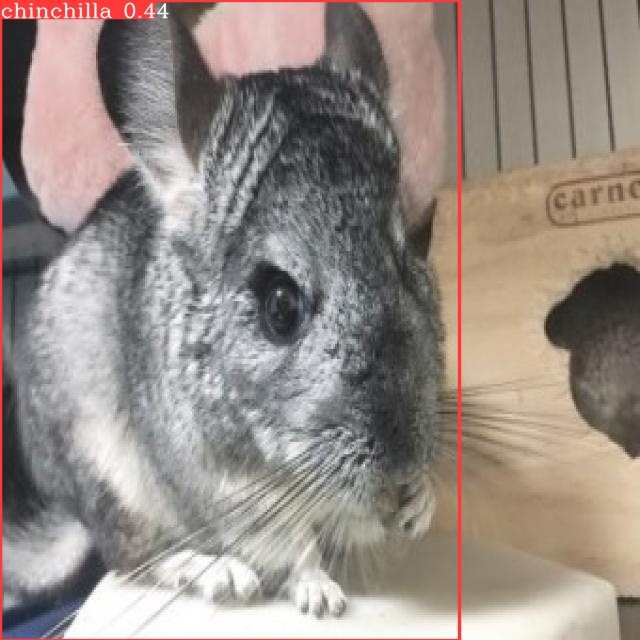

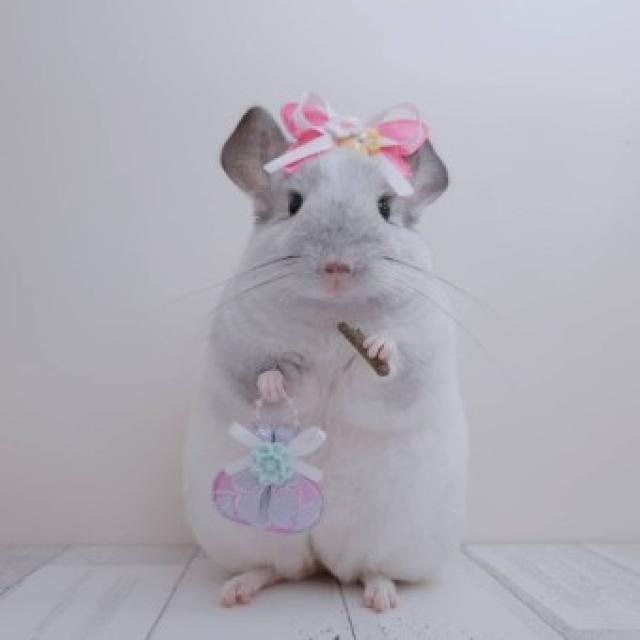

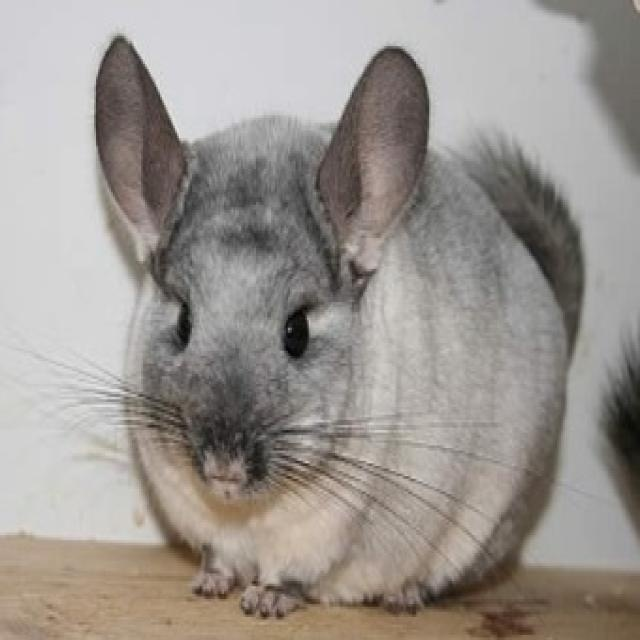

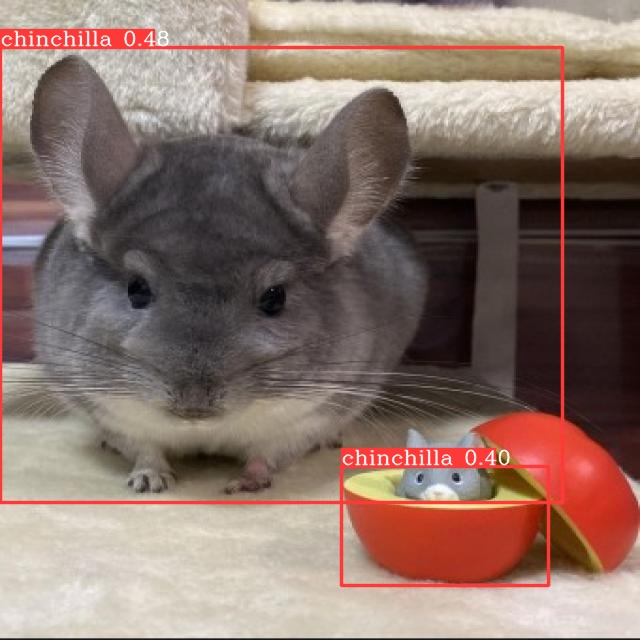

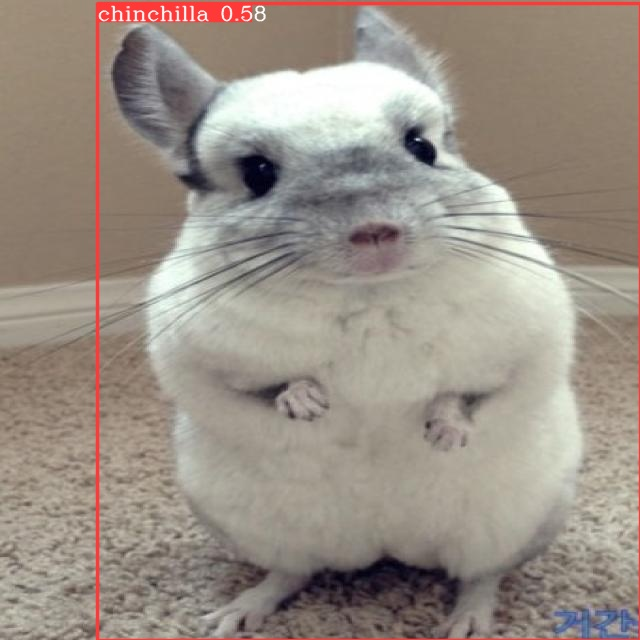

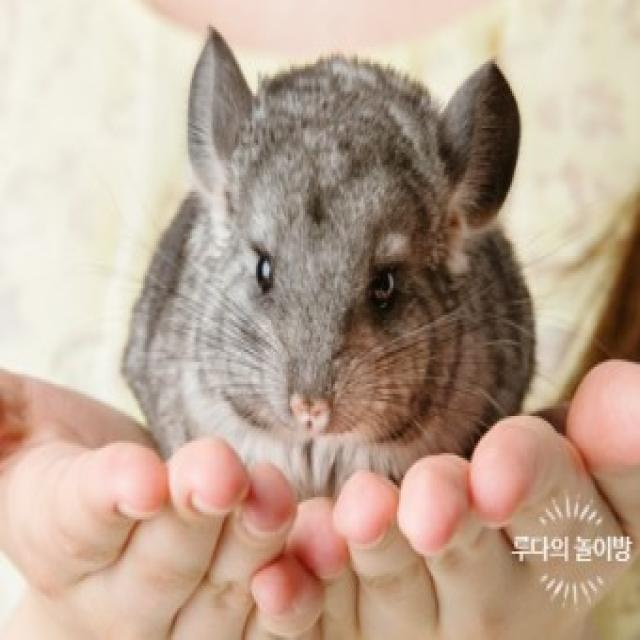

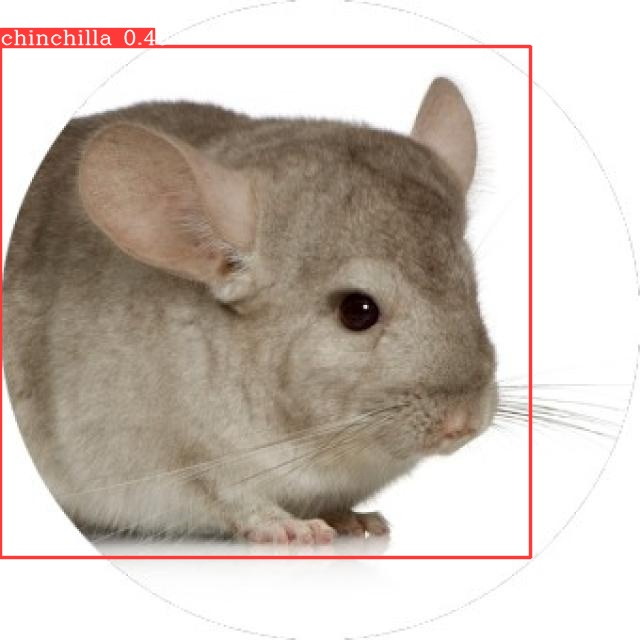

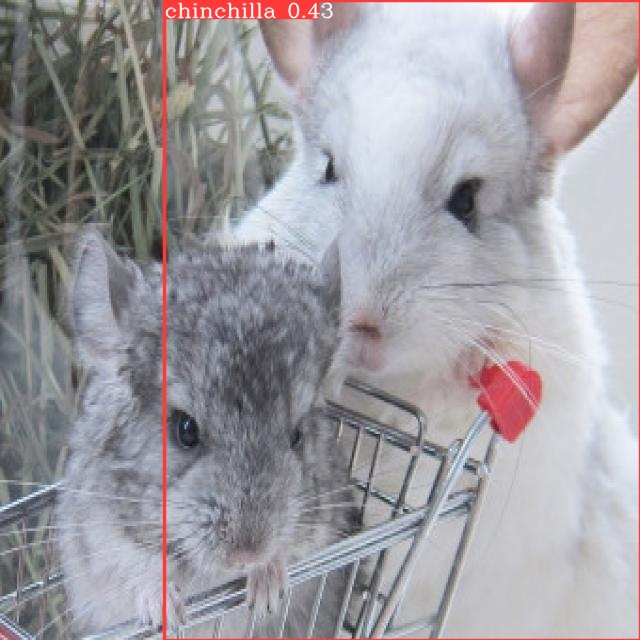

In [45]:
cnt = 0
for image_fn in glob.glob('./runs/inference/exp/*.jpg') :
  if cnt < 10 : # cnt가 10 미만인 경우 이미지를 출력
    display(Image(filename = image_fn))
    print('\n\n')
  cnt += 1